<a href="https://colab.research.google.com/github/katie0809/2022Military-Chatbot-jupyter/blob/main/source/22'Military_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Version History

|version|Score|Changes|Comment|
|-|-|-|-|
|1.0|-|Initial model| 22.07.13 |

## Environments

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
##### SETTINGS FOR COLAB
# API_URL_SAMPLE='https://openapi.mnd.go.kr/3232313634343937343732313632313430/xml/DS_MND_ENLSTMN_DCNT_BEF_INF/1/5/'
# HOME_PATH='/content/drive/MyDrive'
# WORK_DIR=HOME_PATH+'/Colab Notebooks'
# FILES_DIR='/assets'
# MODEL_DIR=WORK_DIR+'/models'

##### SETTINGS FOR LOCAL
API_URL_SAMPLE='https://openapi.mnd.go.kr/3232313634343937343732313632313430/xml/DS_MND_ENLSTMN_DCNT_BEF_INF/1/5/'
HOME_PATH='E:\\Workspace\\Git'
WORK_DIR=HOME_PATH+'/2022Military-Chatbot-jupyter'
FILES_DIR='/assets'
MODEL_DIR=WORK_DIR+'/models'

In [2]:
%cd $WORK_DIR

E:\Workspace\Git\2022Military-Chatbot-jupyter


In [3]:
!python3 --version

Python 3.8.10


## Mecab 설치(Colab)
:한국어 형태소분석기 

In [4]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-07-27 09:00:46--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.84.18, 2620:100:6034:18::a27d:5412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.84.18|:443... connected.
Unable to establish SSL connection.
--2022-07-27 09:01:02--  https://www.dropbox.com/s/i8girnk5p80076c/mecab-ko-dic-2.1.1-20180720.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.84.18, 2620:100:6034:18::a27d:5412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.84.18|:443... connected.
Unable to establish SSL connection.
Cloning into 'mecab-python-0.996'...
fatal: unable to access 'https://bitbucket.org/eunjeon/mecab-python-0.996.git/': server certificate verification failed. CAfile: none CRLfile: none
-bash: line 21: pip: command not found


## Mecab 설치(Window 10)
- pip install로 konlpy 설치 후 아래 링크 따라서 Mecab 설치
- https://uwgdqo.tistory.com/363

#### 동작 확인 

In [467]:
# 정상 동작 확인
from konlpy.tag import Okt, Mecab

okt = Okt()
# mecab = Mecab() # for Mecab installed in colab
mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic") # for Mecab installed in local PC

In [5]:
okt.morphs('한글 형태소 분석기(오케이티)로 테스트를 해보았습니다. 정상 설치 및 동작이 잘 됩니다.')

['한글',
 '형태소',
 '분석',
 '기',
 '(',
 '오',
 '케이티',
 ')',
 '로',
 '테스트',
 '를',
 '해보았습니다',
 '.',
 '정상',
 '설치',
 '및',
 '동작',
 '이',
 '잘',
 '됩니다',
 '.']

In [6]:
mecab.morphs('한글 형태소 분석기(미켑)로 테스트를 해보았습니다. 정상 설치 및 동작이 잘 됩니다.')

['한글',
 '형태소',
 '분석기',
 '(',
 '미',
 '켑',
 ')',
 '로',
 '테스트',
 '를',
 '해',
 '보',
 '았',
 '습니다',
 '.',
 '정상',
 '설치',
 '및',
 '동작',
 '이',
 '잘',
 '됩니다',
 '.']

### Mecab 사용자 사전 추가 
- 예시 : '모바일서비스팀' 사용자 사전 추가 

In [13]:
mecab.morphs('코스콤 모바일서비스팀은 맨날 야근한다.')

['코스콤', '모바일', '서비스', '팀', '은', '맨날', '야근', '한다', '.']

In [24]:
# mecab-ko-dic이 다운되어있는 위치로 이동 

##### COLAB
# MECAB_DIR="/tmp/mecab-ko-dic-2.1.1-20180720/"
# %cd /tmp/mecab-ko-dic-2.1.1-20180720/

#### LOCAL PC
MECAB_DIR="C:\mecab"
%cd $MECAB_DIR
!ls

C:\mecab


'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [25]:
# 미리 만들어둔 사용자 사전 nnp파일 read
with open(WORK_DIR+"/files/nnp.csv", 'r', encoding='utf-8') as f:
  file_new = f.readlines()
file_new

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '모바일서비스팀,,,,NNP,*,F,모바일서비스팀,*,*,*,*,*']

In [30]:
# 기존 /user-dic/nnp.csv 파일에 내용 추가한다 
with open(MECAB_DIR+"/user-dic/nnp.csv", 'w', encoding='utf-8') as f:
  for line in file_new:
    f.write(line)

%cat ./user-dic/nnp.csv

UsageError: Line magic function `%cat` not found.


In [32]:
# mecab의 tool 사용해 추가한 내용으로 다시 빌드
# !bash ./tools/add-userdic.sh
!bash ./tools/add-userdic-win.ps1

./tools/add-userdic-win.ps1: line 1: =: command not found
./tools/add-userdic-win.ps1: line 26: unexpected EOF while looking for matching `"'
./tools/add-userdic-win.ps1: line 39: syntax error: unexpected end of file


In [31]:
# !make install
!bash ./tools/compile-win.ps1

make[1]: Entering directory '/tmp/mecab-ko-dic-2.1.1-20180720'
make[1]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/mecab/dic/mecab-ko-dic'
 /usr/bin/install -c -m 644 model.bin matrix.bin char.bin sys.dic unk.dic left-id.def right-id.def rewrite.def pos-id.def dicrc '/usr/local/lib/mecab/dic/mecab-ko-dic'
make[1]: Leaving directory '/tmp/mecab-ko-dic-2.1.1-20180720'


In [7]:
# 사용자 사전은 적용됐지만 단어 분해시 우선순위가 낮아서 원하는 형태로 적용되지 않음 
# /tmp/mecab-ko-dic-2.1.1-20180720/tools# ./mecab-bestn.sh 
# #표현층,품사,의미부류,좌문맥ID,우문맥ID,낱말비용,연접비용,누적비용
# 모바일서비스팀 
# 모바일서비스팀  NNP,,1786,3545,2953,-1885,1068
# EOS
# 모바일  NNP,,1786,3546,2953,-1885,1068
# 서비스  NNG,,1780,3533,1916,281,3265
# 팀      NNG,,1780,3534,2188,269,5722
# EOS

# !bash ./tools/mecab-bestn.sh
mecab.morphs('코스콤 모바일서비스팀은 맨날 야근한다.')

['코스콤', '모바일서비스팀', '은', '맨날', '야근', '한다', '.']

In [33]:
# 우선순위 조정(단어비용 낮추기) => https://mondayus.tistory.com/46
!sudo make clean
!sudo make install

대우,,,,NNP,*,F,대우,*,*,*,*,*

구글,,,,NNP,*,T,구글,*,*,*,*,*

모바일서비스팀,,,,NNP,*,F,모바일서비스팀,*,*,*,*,*


In [8]:
# 결과확인 
# 모바일서비스팀 
# 모바일서비스팀  NNP,,1786,3545,0,-1885,-1885
# EOS
# 모바일  NNP,,1786,3546,2953,-1885,1068
# 서비스  NNG,,1780,3533,1916,281,3265
# 팀      NNG,,1780,3534,2188,269,5722
# EOS
mecab.morphs('코스콤 모바일서비스팀은 맨날 야근한다.')

['코스콤', '모바일서비스팀', '은', '맨날', '야근', '한다', '.']

#### FastText
: https://pypi.org/project/fasttext/

In [ ]:
# !git clone https://github.com/facebookresearch/fastText.git
%cd $WORK_DIR
# !wget https://files.pythonhosted.org/packages/a4/86/ff826211bc9e28d4c371668b30b4b2c38a09127e5e73017b1c0cd52f9dfa/fasttext-0.8.3.tar.gz
# !tar -xvf fasttext-0.8.3.tar.gz

/content/drive/MyDrive/Colab Notebooks


In [ ]:
%cd $WORK_DIR/fasttext-0.8.3
!pip install .

/content/drive/MyDrive/Colab Notebooks/fasttext-0.8.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/drive/MyDrive/Colab Notebooks/fasttext-0.8.3
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for fasttext: filename=fasttext-0.8.3-cp37-cp37m-linux_x86_64.whl size=1090234 sha256=6bf9cdee02f3fbfc4fcc4ee8b86618769cb1cc22bec5b3490e0884e82728d358
  Stored in directory: /root/.cache/pip/wheels/04/f5/eb/01dae2ec6c6262cc2e650bb47ddb89100623ad833336ad2568
Successfully built fasttext


#### 3i4k 한국어 문장 의도분류모델

In [ ]:
# 소스 다운로드
%cd $WORK_DIR
# !git clone https://github.com/warnikchow/3i4k.git

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# 3i4k 의존모듈 설치 
%cd $WORK_DIR/3i4k
!pip install -r Requirements.txt

/content/drive/MyDrive/Colab Notebooks/3i4k
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 304 kB 5.1 MB/s 
     |████████████████████████████████| 1.4 MB 77.5 MB/s 
     |████████████████████████████████| 4.9 MB 81.4 MB/s 
     |████████████████████████████████| 1.6 MB 70.2 MB/s 
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==1.4.1 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1)
ERROR: No matching distribution found for tensorflow-gpu==1.4.1


In [ ]:
# Tensorflow 버전 하향
!pip uninstall tensorflow
!pip install tensorflow==1.15

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 21 kB/s 
     |████████████████████████████████| 503 kB 76.6 MB/s 
     |████████████████████████████████| 50 kB 8.2 MB/s 
     |████████████████████████████████| 3.8 MB 75.2 MB/s 
  Created wheel 

In [ ]:
!pip install Keras==2.1.2
!pip install nltk==3.3
!pip install librosa==0.6.1
!pip3 install numba==0.48.0
!pip install h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.0 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires keras<2.9,>=2.8.0rc0, but you have keras 2.1.2 which is incompatible.
kapre 0.3.

In [ ]:
# Word Vectors 다운로드 
# %cd $WORK_DIR/3i4k
# !mkdir vectors
# %cd vectors
# !wget -O model_drama.bin --no-check-certificate "https://drive.google.com/file/d/1jHbjOcnaLourFzNuP47yGQVhBTq6Wgor"
# !unzip vectors.zip

In [ ]:
%cd $WORK_DIR/3i4k
!python3 3i4k_demo.py

/content/drive/MyDrive/Colab Notebooks/3i4k












#########################################################
#                                                       #
#       Demonstration video: 3i for Korean (3i4K)       #
#                                                       #
#########################################################
Using TensorFlow backend.


2022-07-19 10:16:19.545749: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-07-19 10:16:19.550074: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200220000 Hz
2022-07-19 10:16:19.550659: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x47178bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-07-19 10:16:19.550690: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-07-19 

In [ ]:
from classify import pred_only_text

In [ ]:
print(pred_only_text('배고프다 점심 뭐먹지?'))

# Install Libraries

In [12]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install sklearn
# !pip install tensorflow

# Import Libraries

In [459]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [460]:
print(tf.__version__)
print(sklearn.__version__)
print(np.__version__)
print(pd.__version__)
print(tf.keras.__version__)

2.2.0
0.22.1
1.18.1
1.0.1
2.3.0-tf


# Dataset Load
- 데이터셋 class 부여
- 데이터셋 전체 통합 후 섞기

In [462]:
def load_dataset(path=WORK_DIR, prefix='train_'):
    idxs = dict()
    ret = pd.DataFrame(columns=['question', 'class', 'label'])
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            if filename.startswith(prefix):
                filepath = os.path.join(dirname, filename)
                df = pd.read_csv(filepath)
                df_class = filename.split('_')[1].split('.')[0]
                df_label = len(idxs)
                
                df['class'] = df_class
                df['label'] = df_label
                idxs[df_label] = df_class
                
                ret = pd.concat([ret, df])
    return ret, idxs

In [463]:
train, idxs = load_dataset()
train = train.sample(frac=1).reset_index(drop=True)
train

,question,class,label
0,중사 1975년에 봉급이 알려줘,pay,2
1,용산주변 주택 있긴해?,housing,1
2,21평 월세는 얼마나 하죠?,chat,0
3,서구근처 관사 있을까?,housing,1
4,해병대에 병장 총 몇명?,personnel,3
...,...,...,...
36279,일병 월급 얼마임,pay,2
36280,파주운정3 A30블록 10년 공공임대에 대해 궁금함,housing,1
36281,목살 넣어도 불고기 하면 맛있나요?,chat,0
36282,세종근방 복지시설 궁금함,welfare,4


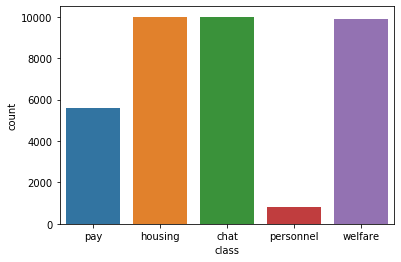

In [464]:
sns.countplot(train['class'])

In [465]:
idxs

{0: 'chat', 1: 'housing', 2: 'pay', 3: 'personnel', 4: 'welfare'}

## 질문 전처리

In [468]:
questions = train['question'].apply(mecab.morphs)
questions

0                             [중사, 1975, 년, 에, 봉급, 이, 알려줘]
1                                 [용산, 주변, 주택, 있, 긴, 해, ?]
2                             [21, 평, 월세, 는, 얼마나, 하, 죠, ?]
3                                   [서구, 근처, 관사, 있, 을까, ?]
4                                 [해병대, 에, 병장, 총, 몇, 명, ?]
                               ...                        
36279                                      [일병, 월급, 얼마, 임]
36280    [파주, 운정, 3, A, 30, 블록, 10, 년, 공공, 임대, 에, 대해, 궁...
36281                    [목살, 넣, 어도, 불고기, 하, 면, 맛있, 나요, ?]
36282                              [세종, 근방, 복지, 시설, 궁금, 함]
36283                         [#, 주소, #, 은, 얼마, 에, 팔려요, ?]
Name: question, Length: 36284, dtype: object

MAX LEN : 56
AVG LEN : 7.624435012677765


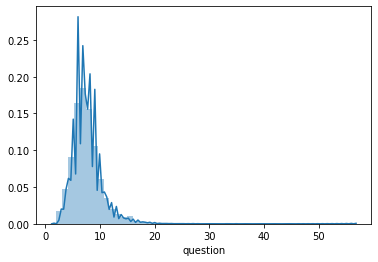

In [469]:
# 질문 분포 확인
sns.distplot(questions.apply(len))
print('MAX LEN :',max(len(l) for l in questions))
print('AVG LEN :',sum(map(len, questions))/len(questions))

In [470]:
# max_len = max(len(l) for l in questions) # 일상질문으로 인한 long tail
max_len = 18

## 토큰화

In [471]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions)

In [472]:
train2 = tokenizer.texts_to_sequences(questions)

In [473]:
train2[:5]

[[94, 1221, 66, 3, 50, 8, 21],
 [226, 22, 49, 2, 34, 4, 1],
 [559, 265, 635, 10, 76, 37, 71, 1],
 [934, 27, 24, 2, 35, 1],
 [95, 3, 116, 177, 44, 67, 1]]

In [474]:
intent_label_size = train['label'].nunique()
vocab_size = len(tokenizer.word_index) + 1
print("총 의도의 개수는 : ", intent_label_size)
print("총 단어의 개수는 : ", vocab_size)

총 의도의 개수는 :  5
총 단어의 개수는 :  6899


## 패딩

In [475]:
padded = pad_sequences(train2, maxlen=max_len)

# 학습 셋 분리

In [486]:
from sklearn.model_selection import train_test_split

# Dataframe을 ratio비율로 분할해 반환
def df_split(df, ratio=0.2):
    idx = np.round(len(df) * ratio)
    return df[:idx], df[idx:]

# x_train, x_valid, y_train, y_valid 반환
def train_valid_split(x_df, y_df, ratio=0.15):
    return train_test_split(x_df, y_df, test_size=ratio, random_state=42, stratify=y_df)

In [487]:
x_train, x_valid, y_train, y_valid = train_valid_split(padded, train['label'])
display(x_train, x_valid)

array([[ 0,  0,  0, ..., 13,  4, 23],
       [ 0,  0,  0, ...,  2,  5,  1],
       [ 0,  0,  0, ...,  2, 29,  1],
       ...,
       [ 0,  0,  0, ..., 42, 19, 60],
       [ 0,  0,  0, ...,  8, 42, 19],
       [ 0,  0,  0, ..., 47,  8, 21]])

array([[  0,   0,   0, ...,   2,  26,   1],
       [  0,   0,   0, ...,  83, 125,   1],
       [  0,   0,   0, ...,  34,   4,   1],
       ...,
       [  0,   0,   0, ...,   2,   5,   1],
       [  0,   0,   0, ...,  13,   4,  23],
       [  0,   0,   0, ...,  34,   4,   1]])

## Target 인코딩

In [488]:
y_train = to_categorical(y_train, num_classes=intent_label_size)
y_valid = to_categorical(y_valid, num_classes=intent_label_size)

# 모델 학습
## 1-GRU

In [489]:
import pickle
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall, AUC

In [490]:
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GRU(128))
model.add(Dense(intent_label_size, activation='softmax'))

In [483]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint(WORK_DIR+'/models/intent_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [491]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc', 'mae'])
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=5, 
                    callbacks=[es, mc], 
                    batch_size=16)

Epoch 1/5
1539/1542 [============================>.] - ETA: 0s - loss: 0.0583 - acc: 0.9806 - mae: 0.0139
Epoch 00001: val_acc did not improve from 0.99986
1542/1542 [==============================] - 19s 13ms/step - loss: 0.0582 - acc: 0.9806 - mae: 0.0138 - val_loss: 0.0012 - val_acc: 0.9997 - val_mae: 2.7730e-04
Epoch 2/5
1542/1542 [==============================] - ETA: 0s - loss: 0.0018 - acc: 0.9995 - mae: 4.1851e-04
Epoch 00002: val_acc did not improve from 0.99986
1542/1542 [==============================] - 29s 19ms/step - loss: 0.0018 - acc: 0.9995 - mae: 4.1851e-04 - val_loss: 0.0011 - val_acc: 0.9997 - val_mae: 3.3033e-04
Epoch 3/5
1542/1542 [==============================] - ETA: 0s - loss: 1.5140e-04 - acc: 1.0000 - mae: 5.4826e-05- ETA: 2s - loss: 1.6327e
Epoch 00003: val_acc did not improve from 0.99986
1542/1542 [==============================] - 29s 19ms/step - loss: 1.5140e-04 - acc: 1.0000 - mae: 5.4826e-05 - val_loss: 9.2874e-04 - val_acc: 0.9997 - val_mae: 2.0664e

## 2-BERT

In [4]:
# WARNING 비활성화
import warnings
warnings.filterwarnings('ignore')

#### Load Pretrained Bert

In [171]:
import tensorflow_hub as hub

bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1', trainable=True)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()

In [179]:
!curl "https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py"

404: Not Found


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    14  100    14    0     0    170      0 --:--:-- --:--:-- --:--:--   172


## Build Bert Model

#### Load Bert Tokenizer

In [449]:
import torch
from transformers import BertModel, BertConfig, BertTokenizer, BertForSequenceClassification

#### Sequence Classification 을 위한 BERT

In [450]:
tokenizer = BertTokenizer(WORK_DIR+'/files/vocab.txt')
config = BertConfig.from_json_file(WORK_DIR+"/files/config_bertseqclassification.json")
model = BertForSequenceClassification(config)

#### 입출력 예제

In [451]:
text = ['소령 월급은 얼마니', '중령 월급은 얼마니', '여의도 근처 놀데있으려나?', '배고파.. 오늘 저녁 뭐먹지', '수원에 놀데있어?']
target = torch.tensor([0,0,1,2,1])

In [452]:
encoded_input = tokenizer(text, padding=True)
encoded_input

{'input_ids': [[101, 1461, 30011, 29994, 30010, 30025, 1463, 30015, 30022, 29991, 30017, 30024, 29999, 30017, 30021, 1463, 30008, 30022, 29995, 30006, 29992, 30019, 102, 0, 0, 0, 0], [101, 1464, 30014, 30025, 29994, 30010, 30025, 1463, 30015, 30022, 29991, 30017, 30024, 29999, 30017, 30021, 1463, 30008, 30022, 29995, 30006, 29992, 30019, 102, 0, 0, 0], [101, 1463, 30010, 29999, 30018, 29993, 30011, 1455, 30017, 30021, 30001, 30008, 100, 1029, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1460, 30007, 29991, 30011, 30004, 30006, 1012, 1012, 1463, 30011, 29992, 30017, 30022, 1464, 30008, 29992, 30010, 30020, 1459, 30015, 29995, 30008, 30020, 30000, 30019, 102], [101, 1461, 30014, 29999, 30015, 30021, 29999, 30009, 100, 1029, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 

In [453]:
model.config

BertConfig {
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "finetuning_task": "yelp_polarity",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.20.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [454]:
train_inputs = torch.tensor(encoded_input['input_ids'])
train_labels = torch.tensor(target)
train_masks = torch.tensor(encoded_input['attention_mask'])

In [455]:
outputs = model_seq(train_inputs, train_masks, token_type_ids=None, labels=target)

In [456]:
outputs

SequenceClassifierOutput(loss=tensor(1.2129, grad_fn=<NllLossBackward0>), logits=tensor([[-0.0795, -0.0783,  0.5641],
        [-0.0488,  0.1285,  0.3108],
        [ 0.1150, -0.1663,  0.3463],
        [ 0.1898, -0.3048,  0.4282],
        [ 0.1737,  0.1019,  0.3484]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

## Train BERT

In [444]:
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률
                  eps = 1e-8 # 0으로 나누는 것을 방지하기 위한 epsilon 값
                )

In [445]:
loss = outputs[0]
loss.backward()
torch.nn.utils.clip_grad_norm_(model_seq.parameters(), 1.0)
optimizer.step()

In [446]:
# model.eval()

In [447]:
test_input = tokenizer(['소령 월급은 얼마니', '중령 월급은 얼마니', '메롱 띠용삐용'], padding=True)
test_inputs = torch.tensor(test_input['input_ids'])
test_masks = torch.tensor(test_input['attention_mask'])
test_input

{'input_ids': [[101, 1461, 30011, 29994, 30010, 30025, 1463, 30015, 30022, 29991, 30017, 30024, 29999, 30017, 30021, 1463, 30008, 30022, 29995, 30006, 29992, 30019, 102, 0], [101, 1464, 30014, 30025, 29994, 30010, 30025, 1463, 30015, 30022, 29991, 30017, 30024, 29999, 30017, 30021, 1463, 30008, 30022, 29995, 30006, 29992, 30019, 102], [101, 1459, 30009, 29994, 30011, 30025, 100, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}

In [448]:
preds = model_seq(test_inputs, test_masks)
preds

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.0555, -0.2256,  0.3133],
        [-0.2305, -0.1767,  0.3153],
        [ 0.0902, -0.4346,  0.4534]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [188]:
import numpy as np
np.argmax(preds[0], axis=1).flatten()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [ ]:
# 학습
# 정확도 계산 함수
def flat_accuracy(preds, labels):
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [62]:
def build_model(bert_layer, max_len):
    
    encoded_input = tokenizer(text, return_tensors='pt')
    outputs = bert_layer(**encoded_input)
    clf_output = outputs.last_hidden_state[:, 0, :]
    output = Dense(1, activation='sigmoid')(clf_output)
    model = Model([input_tk, input_mask, input_seg], output)
    model.compile(metrics=['acc'], loss='binary_crossentropy', optimizer=Adam(lr=0.00001))
    
    return model

## 모델 저장

In [492]:
loaded_model = load_model(WORK_DIR+'/models/intent_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_valid, y_valid)[1]))

171/171 [==============================] - 0s 3ms/step - loss: 8.9984e-04 - acc: 0.9998 - mean_absolute_error: 1.8671e-04

 테스트 정확도: 0.9998


## 토크나이저 저장

In [493]:
# saving
with open(WORK_DIR+'/files/intent_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [494]:
with open(WORK_DIR+'/files/intent_tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

# 테스트

In [495]:
def predict(new_sentence, label_to_intent=idxs):
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  encoded = loaded_tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  y_predicted = loaded_model.predict(pad_new) # 예측
  max_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
  return label_to_intent[max_predicted[0]], y_predicted

In [502]:
predict('해군에 대위 몇명임?')

('personnel',
 array([[4.1055761e-04, 5.7663052e-05, 1.5312906e-04, 9.9937731e-01,
         1.2932321e-06]], dtype=float32))

In [497]:
predict('여의도 근처 놀데 있나?')

('welfare',
 array([[7.463856e-03, 5.409055e-05, 4.945182e-05, 9.317784e-06,
         9.924233e-01]], dtype=float32))

In [498]:
predict('소노캄에 뭐있어?')

('welfare',
 array([[2.99633597e-04, 1.78473230e-04, 1.14969125e-05, 4.21400910e-06,
         9.99506235e-01]], dtype=float32))

In [499]:
predict('요즘 대위는 얼마정도 받으려나..')

('chat',
 array([[9.9981385e-01, 2.2176284e-05, 5.3426065e-05, 8.2374150e-05,
         2.8262642e-05]], dtype=float32))

In [500]:
predict('소령 3호봉 얼마받는지 궁금쓰')

('pay',
 array([[2.6351796e-03, 1.3322866e-04, 9.9099720e-01, 3.0136050e-04,
         5.9329858e-03]], dtype=float32))

In [501]:
predict('배고파 저녁뭐먹지?')

('chat',
 array([[9.9992681e-01, 1.4567042e-05, 8.7566934e-07, 4.6106266e-05,
         1.1653655e-05]], dtype=float32))

In [503]:
predict("서울쪽 군 관사 뭐있는지 궁금")

('housing',
 array([[6.9519973e-07, 9.9999523e-01, 1.0072197e-07, 2.3845416e-06,
         1.5519720e-06]], dtype=float32))